In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df_hospital = pd.read_csv('Hospital_Dataset_2020_2024.csv')
df_hospital.head()

,admission_date,hospital_name,admission_count,condition_type,patient_age_group,patient_gender,readmission_count,severity_level,length_of_stay_avg,seasonal_indicator,comorbid_conditions_count,primary_diagnosis_code,daily_medication_dosage,emergency_visit_count
0,2020-01-01 00:00:00,Mecca City Hospital,1,Asthma,46-65,Female,0,Moderate,2.781828,Winter,1,Other,17.455517,2
1,2020-01-01 01:00:00,Dammam General Hospital,2,Asthma,0-17,Female,1,Mild,4.141432,Winter,0,Other,15.099498,3
2,2020-01-01 02:00:00,Mecca City Hospital,1,Asthma,46-65,Female,1,Moderate,8.507026,Winter,2,I21,23.087843,3
3,2020-01-01 03:00:00,Medina Specialist Hospital,3,Asthma,46-65,Male,0,Mild,4.622657,Winter,3,J45,25.247579,2
4,2020-01-01 04:00:00,Medina Specialist Hospital,5,COPD,18-45,Female,2,Moderate,5.818385,Winter,3,J45,18.255290,1


# check from the data and see if need to clean or not

In [105]:
# discribe the numeric values:
df_hospital.describe()

,admission_count,readmission_count,length_of_stay_avg,comorbid_conditions_count,daily_medication_dosage,emergency_visit_count
count,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.000963,0.498435,4.993438,2.004357,20.019090,1.005777
std,1.417342,0.708508,1.498250,1.422819,4.979723,0.997609
min,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000
25%,1.000000,0.000000,3.963454,1.000000,16.646086,0.000000
50%,2.000000,0.000000,4.989844,2.000000,20.032117,1.000000
75%,3.000000,1.000000,6.008598,3.000000,23.409451,2.000000
max,10.000000,5.000000,10.000000,11.000000,40.000000,7.000000


In [106]:
# discribe the numeric values:
df_hospital.describe(exclude='number')

,admission_date,hospital_name,condition_type,patient_age_group,patient_gender,severity_level,seasonal_indicator,primary_diagnosis_code
count,41544,41544,41544,41544,41544,41544,41544,41544
unique,41544,8,4,4,2,3,4,4
top,2024-09-26 23:00:00,Riyadh National Hospital,Asthma,18-45,Male,Moderate,Spring,J45
freq,1,5378,20752,16708,24938,16636,11040,16759


In [3]:
# the column 'primary_diagnosis_code' beuase I don't want it for this project:
df_hospital.drop(columns='primary_diagnosis_code', inplace=True)

In [4]:
df_hospital.head()

,admission_date,hospital_name,admission_count,condition_type,patient_age_group,patient_gender,readmission_count,severity_level,length_of_stay_avg,seasonal_indicator,comorbid_conditions_count,daily_medication_dosage,emergency_visit_count
0,2020-01-01 00:00:00,Mecca City Hospital,1,Asthma,46-65,Female,0,Moderate,2.781828,Winter,1,17.455517,2
1,2020-01-01 01:00:00,Dammam General Hospital,2,Asthma,0-17,Female,1,Mild,4.141432,Winter,0,15.099498,3
2,2020-01-01 02:00:00,Mecca City Hospital,1,Asthma,46-65,Female,1,Moderate,8.507026,Winter,2,23.087843,3
3,2020-01-01 03:00:00,Medina Specialist Hospital,3,Asthma,46-65,Male,0,Mild,4.622657,Winter,3,25.247579,2
4,2020-01-01 04:00:00,Medina Specialist Hospital,5,COPD,18-45,Female,2,Moderate,5.818385,Winter,3,18.255290,1


from the results we saw:
- The data as no empty cells, so we don't need to delete any row.
- The data has understandable column names, no need to change the title of it or the data inside it's cells.
- we deleted 'primary_diagnosis_code' column because we don't need it.

In [113]:
#write the color pallete of severity level:
severity_level_pallete = ['#d90c05', '#f39c12', '#85c1e9']
# write style code:
sn.set_style('whitegrid')

# (Univariate analyze)

## 1. See the distrubiotion of the stay length:

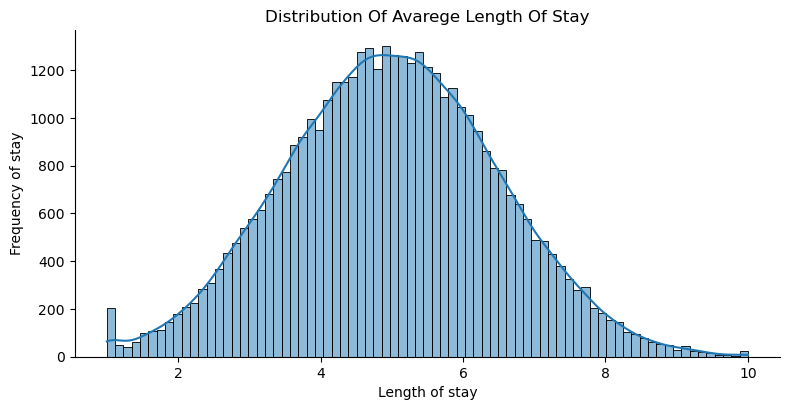

In [10]:
# draw the chart:
sn.displot(data=df_hospital, x='length_of_stay_avg', kde=True, height=4, aspect=2)
plt.title('distribution of avarege length of stay'.title())
plt.xlabel('Length of stay')
plt.ylabel('Frequency of stay')
plt.show()

insights:
- From the graph, almost the density of avg length stay between 3.8 and 6.1 days.
- we saw that it has some outliers at 1 day.

# (Bivariate analyze)

## 1. See the relation between the length of stay and the severity level:

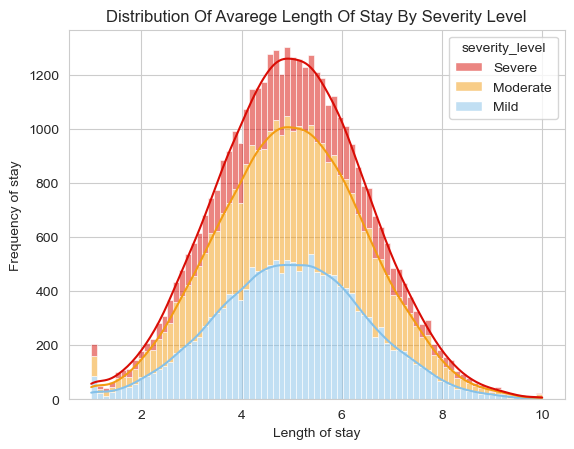

In [117]:
# draw the chart:
sn.histplot(data=df_hospital, x='length_of_stay_avg', hue='severity_level', hue_order=['Severe','Moderate', 'Mild'], palette=severity_level_pallete , multiple='stack',kde=True)
plt.title('distribution of avarege length of stay by severity level'.title())
plt.xlabel('Length of stay')
plt.ylabel('Frequency of stay')
plt.show()

insights:
- we see that it has no specific relation type between the severity level and the length of stay avg at the first time, but if
we focused on the patient at severe level we see that they need more time than other levels, so the relation is direct between them.

## 2. See the relation between severity level and the season:

In [89]:
# (1) prepare the data:
season_severity = df_hospital.groupby(['seasonal_indicator', 'severity_level']).size().reset_index().rename(columns={ 0 : 'count'})
season_severity

,seasonal_indicator,severity_level,count
0,Fall,Mild,3741
1,Fall,Moderate,3744
2,Fall,Severe,1875
3,Spring,Mild,4389
4,Spring,Moderate,4406
5,Spring,Severe,2245
6,Summer,Mild,4370
7,Summer,Moderate,4445
8,Summer,Severe,2225
9,Winter,Mild,4028


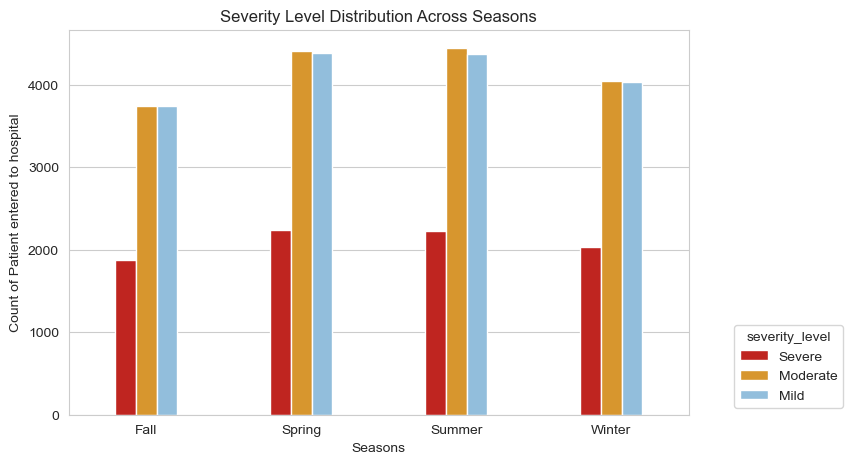

In [109]:
# (2) draw the chart:
plt.figure(figsize=(8,5))
s = sn.barplot(data=season_severity, x='seasonal_indicator', y='count', hue='severity_level',hue_order=['Severe','Moderate', 'Mild'], palette=severity_level_pallete, width=0.4)
sn.move_legend(s, "upper right", bbox_to_anchor=(1.26, 0.25)) # put the lagend outside of the figure.
plt.title('Severity level Distribution Across seasons'.title())
plt.xlabel('Seasons')
plt.ylabel('Count of Patient entered to hospital')
plt.show()

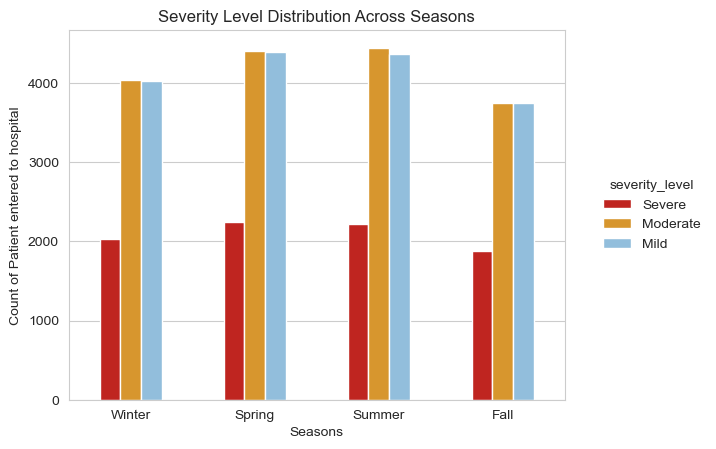

In [111]:
# (3) easier way to do the same comparation with countplot():
season_severity2 = sn.countplot(data=df_hospital, x='seasonal_indicator', hue='severity_level', hue_order=['Severe','Moderate', 'Mild'], palette=severity_level_pallete, width=0.5)
# put the legand outside the figure, without the frame, and at one column:
sn.move_legend(season_severity2, "center right",bbox_to_anchor=(1.3, 0.5), ncol=1, frameon=False) 
plt.title('Severity level Distribution Across seasons'.title())
plt.xlabel('Seasons')
plt.ylabel('Count of Patient entered to hospital')
plt.show()

insghits:
- ًWe see the count of patients were more at spring and summer and also the severe level was more also.
- Plants bloom in spring, maybe causing respiratory diseases more than other seasons.
- The high tempreture mybe lead to increase the respiratory diseasesز Also because of the spread of dust in this season more than othersز

## 3. See the relation between the comorbid conditions and the emregency visit count:

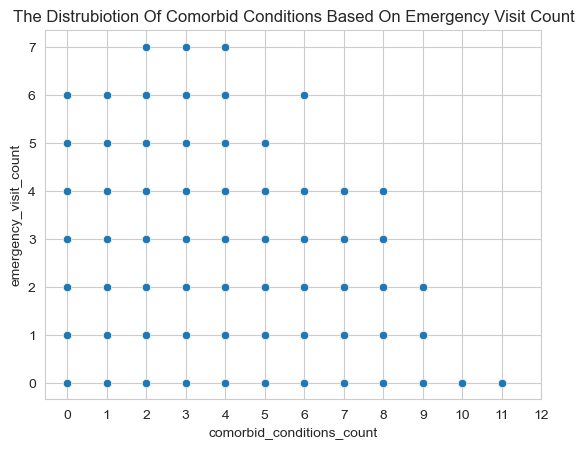

In [116]:
sn.scatterplot(data=df_hospital, x='comorbid_conditions_count', y='emergency_visit_count')
plt.xticks(range(0,13,1))
plt.title('The distrubiotion of comorbid conditions based on emergency visit count'.title())
# don't want to rename the x and y labels to avoid misunderstanding.
plt.show()

insights:
- We see that has no clear relationship between comorbid condition count and emergency visit count, which mean it need more specific
analyze for them.

## 4. The distribution of condition type based on age groups:

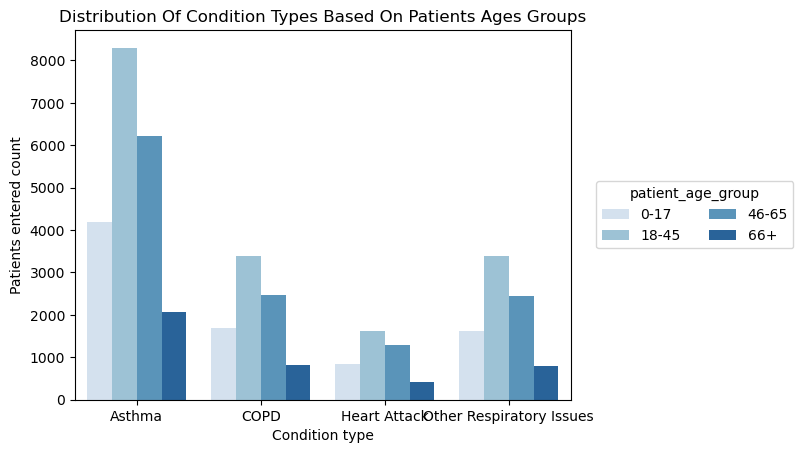

In [11]:
disase = sn.countplot(data=df_hospital, x='condition_type', hue='patient_age_group', hue_order=['0-17','18-45','46-65','66+'], palette='Blues')
sn.move_legend(disase, "center",bbox_to_anchor=(1.25, 0.5), ncol=2)
plt.title('distribution of condition types based on patients ages groups'.title())
plt.xlabel('Condition type')
plt.ylabel('Patients entered count')
plt.show()

insights:
- From the distribution of condition type we see that the 'Asthma' in Saudi Arabia is more than other respiratory diseases.
- We see that the '18-45' age gruop is more susceptible to respiratory diseases, perhaps due to their lifestyle and greater interaction with people, whether for work, study, or other reasons.

## 5. The relation between comorbid conditions and daily medication dosage they got:

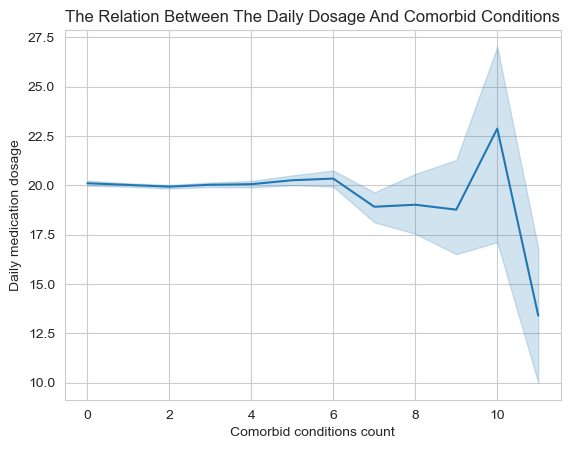

In [119]:
sn.lineplot(data=df_hospital, x='comorbid_conditions_count', y='daily_medication_dosage')
plt.title('the relation between the daily dosage and comorbid conditions'.title())
plt.xlabel('Comorbid conditions count')
plt.ylabel('Daily medication dosage')
plt.show()

insights:
- From comorbid conditions we see that poeple who have from after 6 to 9 diseases got less dosage from how has 0-6 diseases.
- Pouple who have 10 diseases got the most amount of dosage.

## 6. See the relation between the gender and condition type:

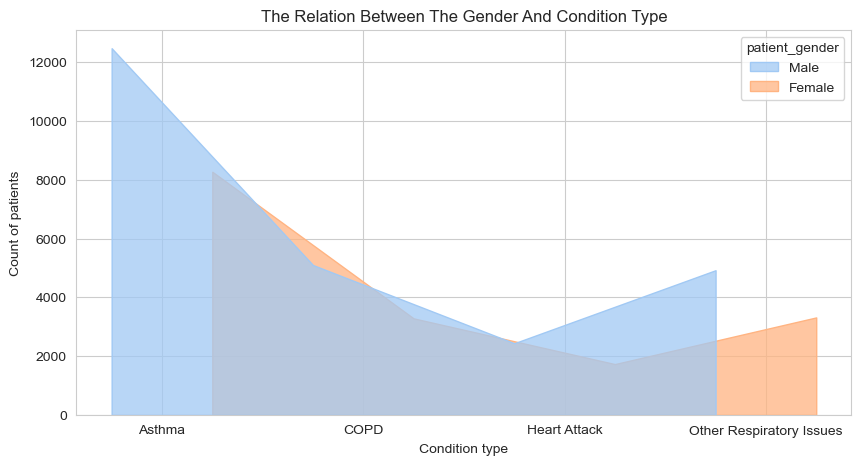

In [122]:
plt.figure(figsize=(10,5))
sn.histplot(data=df_hospital, x='condition_type', hue='patient_gender', hue_order=['Male', 'Female'], element='poly', multiple='dodge', palette='pastel')
plt.title('The relation between the gender and condition type'.title())
plt.xlabel('Condition type')
plt.ylabel('Count of patients')
plt.show()

insights:
- From the graph we see that in general men got respiratory diseases more than female.
- Female didn't got 'Asthma' as men also heart attack.

# (Multivariate analyze)

## 1. Use pairplot to see the relations between numric values in the dataset:

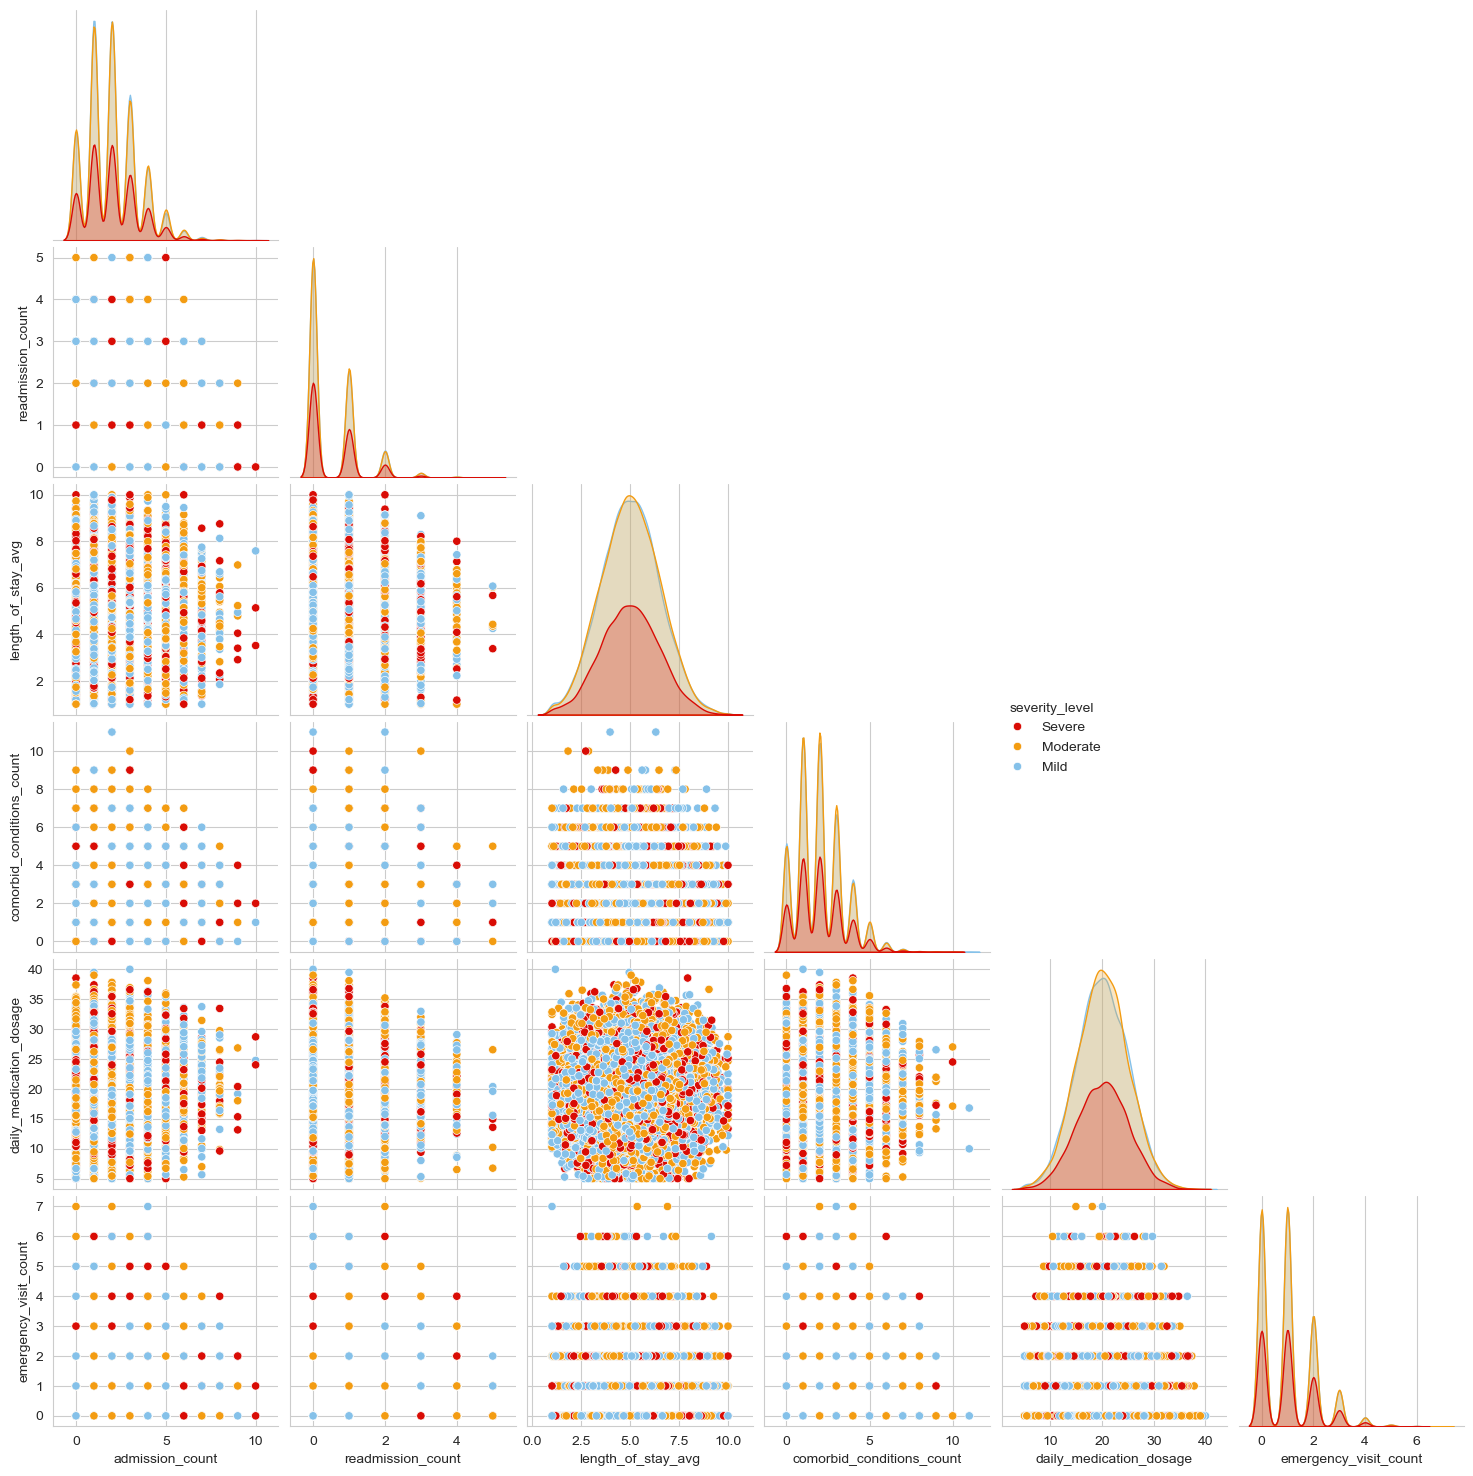

In [125]:
pair_plot = sn.pairplot(df_hospital, diag_kind="kde", hue='severity_level', hue_order=['Severe','Moderate', 'Mild'], palette=severity_level_pallete, corner=True)
sn.move_legend(pair_plot, 'center right', bbox_to_anchor=(0.7, 0.5))
plt.show()

insights:
- From the graph, we see that the dataset has no more outliers, but not all, for example see the relation between length of stay and
emergency visit count it has little of outliers (center above: two are 'Mild' and two are 'Moderate').
- From 'kde' graph, we see almost of numeric data grouped as categurical, for example: 'emergency_visit_count',
and other has smooth distribution, such as 'daily_medication_dasage'